In [23]:
# prompt: Lee como dataframe el archivo csv

import pandas as pd

df = pd.read_csv('/content/pinguinos_limpios_codificados_normalizados.csv')
print(df.head())


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_id  \
0          0.254545         0.666667           0.152542     0.291667     1.0   
1          0.269091         0.511905           0.237288     0.305556     0.0   
2          0.298182         0.583333           0.389831     0.152778     0.0   
3          0.167273         0.738095           0.355932     0.208333     0.0   
4          0.261818         0.892857           0.305085     0.263889     1.0   

   species_id  island_id  
0           0        1.0  
1           0        1.0  
2           0        1.0  
3           0        1.0  
4           0        1.0  


In [24]:
# prompt: usa train test split para separar el df

from sklearn.model_selection import train_test_split

# Supongamos que 'target_column' es el nombre de la columna que quieres predecir
df1 = df.copy()
X = df1.drop('species_id', axis=1)
y = df['species_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (266, 6)
X_test shape: (67, 6)
y_train shape: (266,)
y_test shape: (67,)


In [25]:
# prompt: arma un arbol de decision usando scikit learn para clasificar

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crea una instancia del clasificador de árbol de decisión
tree_classifier = DecisionTreeClassifier()

# Entrena el modelo con los datos de entrenamiento
tree_classifier.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = tree_classifier.predict(X_test)




In [28]:
# prompt: Evalua el modelo con accuracy, precision, f1 y recall para cada especie

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Evaluar el modelo con accuracy, precision, f1 y recall para cada especie
print(classification_report(y_test, y_pred))

# Puedes calcular métricas individuales para cada clase si lo necesitas
# Por ejemplo, para la precisión de la clase 0:
# precision_class_0 = precision_score(y_test, y_pred, average=None)[0]
# print("Precisión para la clase 0:", precision_class_0)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.88      1.00      0.93        14
           2       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



In [26]:
# prompt: Evalua el modelo con accuracy, precision, f1 y recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision) del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calcula la exhaustividad (recall) del modelo
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calcula la puntuación F1 del modelo
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.9552238805970149
Precision: 0.9589552238805971
Recall: 0.9552238805970149
F1 Score: 0.9555699762059269


Matriz de Confusión:
[[28  1  0]
 [ 0 14  0]
 [ 1  1 22]]


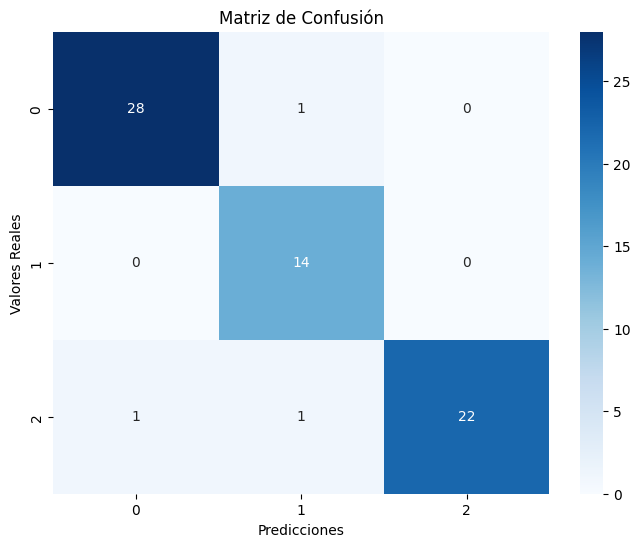

In [27]:
# prompt: arma una matriz de confusion para las especies

from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Puedes visualizar la matriz de confusión con un mapa de calor usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()
